Distribución de las clases:
Target
0    894
1    106
Name: count, dtype: int64


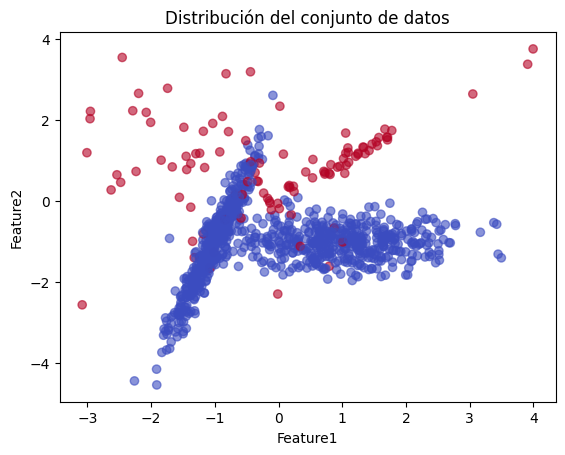

In [24]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
# Generar datos desbalanceados
# The sum of n_informative + n_redundant + n_repeated should be less than or equal to n_features
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
            n_informative=2, n_redundant=0, n_repeated=0, # Adjusted parameters
            weights=[0.9, 0.1], random_state=42)

data = pd.DataFrame(X, columns=["Feature1", "Feature2"])

data["Target"] = y

# Visualización inicial

print("Distribución de las clases:")
print(data["Target"].value_counts())

# Graficar la distribución de datos

plt.scatter(data["Feature1"], data["Feature2"], c=data["Target"], cmap="coolwarm", alpha=0.6)
plt.title("Distribución del conjunto de datos")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[["Feature1", "Feature2"]], data["Target"], test_size=0.3, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
print("Reporte de clasificación (modelo desbalanceado):")
print(classification_report(y_test, y_pred))


Reporte de clasificación (modelo desbalanceado):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       268
           1       0.86      0.56      0.68        32

    accuracy                           0.94       300
   macro avg       0.90      0.78      0.82       300
weighted avg       0.94      0.94      0.94       300



In [4]:

from imblearn.over_sampling import SMOTE
# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Entrenar el modelo con datos balanceados
model.fit(X_resampled, y_resampled)
y_pred_resampled = model.predict(X_test)
# Evaluar el modelo balanceado
print("Reporte de clasificación (modelo balanceado):")
print(classification_report(y_test, y_pred_resampled))

Reporte de clasificación (modelo balanceado):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       268
           1       0.47      0.88      0.61        32

    accuracy                           0.88       300
   macro avg       0.72      0.88      0.77       300
weighted avg       0.93      0.88      0.89       300



In [11]:
import plotly.express as px

In [12]:
url = 'Data/creditcard.csv'
dataset = pd.read_csv(url)

In [14]:
labels=["Genuine","Fraud"]

fraud_or_not = dataset["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values= dataset['Class'].value_counts(), names=labels
             ,title="True vs False")
fig.show()

In [19]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 23)

In [36]:
from sklearn.model_selection import StratifiedKFold

Folds = StratifiedKFold(n_splits=10, shuffle=False)

In [37]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

score = cross_val_score(model, X_train, y_train, cv=Folds, scoring='accuracy')

score


print("The mean is :  {}".format(score.mean()))

The mean is :  0.9214285714285715


In [38]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state=42)
X, y = over_sampler.fit_resample(X_train, y_train)
# Visualize the percentage of values after oversampling
oversampled_counts = y.value_counts()
oversampled_labels = ["True", "False"]

fig = px.pie(values=oversampled_counts, names=oversampled_labels, title="Distribution after Random Oversampling")
fig.show()


In [39]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

score = cross_val_score(model, X, y, cv=Folds, scoring='accuracy')

score


print("The mean is :  {}".format(score.mean()))

The mean is :  0.8530222222222221


In [41]:
from imblearn.over_sampling import SMOTE

over_sampler = SMOTE(random_state = 42)
X, y = over_sampler.fit_resample(X_train, y_train)
# Visualize the percentage of values after oversampling
oversampled_counts = y.value_counts()
oversampled_labels = ["True", "False"]

fig = px.pie(values=oversampled_counts, names=oversampled_labels, title="Distribution after SMOTE")
fig.show()

In [42]:
model = LogisticRegression()

score = cross_val_score(model, X, y, cv=Folds, scoring='accuracy')

score


print("The mean is :  {}".format(score.mean()))

The mean is :  0.8506095238095238
